### **DATA MINING AND ADVANCED ANALYSIS (MN 563) - Assignment 2**

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore    
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, 
recall_score, f1_score, r2_score)
from sklearn.metrics import confusion_matrix

### 1. DATA LOADING

In [ ]:
# Loading data
data = pd.read_csv('Akura Soils Assay.csv')

### 2. MISSING VALUE ANALYSIS & HANDLING

In [3]:
# Check for missing values in each column 
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Display rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]
print("\nRows with Missing Values:\n", rows_with_missing)

# Handle missing values: for demonstration, fill with mean for numerical columns
data_filled = data.fillna(data.mean(numeric_only=True))
print("\nData after Handling Missing Values:\n", data_filled.head())


Missing Values in Each Column:
 SAMPLE     0
Be_ppm     0
Cs_ppm     0
Li_ppm     0
Nb_ppm     0
P_ppm      0
Rb_ppm     0
Sn_ppm     0
Ta_ppm    92
Th_ppm     0
U_ppm      0
Y_ppm      0
dtype: int64

Rows with Missing Values:
        SAMPLE  Be_ppm  Cs_ppm  Li_ppm  Nb_ppm  P_ppm  Rb_ppm  Sn_ppm  Ta_ppm  \
11   IJSS0011   1.345    1.41   12.65   1.184    127  57.963    0.86     NaN   
13   IJSS0013   1.302    1.55   11.87   0.709    178  31.312    1.78     NaN   
26   IJSS0026   1.060    1.68   19.51   0.741    196  44.507    1.67     NaN   
28   IJSS0028   1.255    0.53   15.04   0.442    287  40.676    2.61     NaN   
29   IJSS0029   2.305    2.49   13.41   0.540    239  19.402    1.58     NaN   
..        ...     ...     ...     ...     ...    ...     ...     ...     ...   
196  IJSS0196   6.590    1.82   15.65   0.545   1673  10.722    1.70     NaN   
197  IJSS0197   1.100    6.22   22.39   1.164    288  28.679    2.68     NaN   
198  IJSS0198   1.559    5.72   16.06   1.241    22

### 3. NOISE AND INCONSISTENT DATA DETECTION

In [4]:
# Check for duplicate rows
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Check for inconsistent data types
print("\nData Types:\n", data.dtypes)

# Detect outliers using Z-score for numerical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(data[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print("\nNumber of rows with outliers:", outliers.sum())
print("\nRows with outliers:\n", data[outliers])

Number of duplicate rows: 0

Data Types:
 SAMPLE     object
Be_ppm    float64
Cs_ppm    float64
Li_ppm    float64
Nb_ppm    float64
P_ppm       int64
Rb_ppm    float64
Sn_ppm    float64
Ta_ppm    float64
Th_ppm    float64
U_ppm     float64
Y_ppm     float64
dtype: object

Number of rows with outliers: 20

Rows with outliers:
        SAMPLE  Be_ppm  Cs_ppm  Li_ppm  Nb_ppm  P_ppm   Rb_ppm  Sn_ppm  Ta_ppm  \
38   IJSS0038   5.471   13.74   64.67   0.615    364   48.792    5.04   0.012   
39   IJSS0039   2.879   33.14  966.00   1.409   3651   80.829    2.52   0.046   
56   IJSS0056   1.625    1.12    7.24   0.447    417   13.052    1.86     NaN   
82   IJSS0082   2.303    5.64   24.41   2.051    171   73.877    1.97   0.010   
95   IJSS0095   2.568    3.56   24.10   2.017    179   63.788    1.58   0.009   
96   IJSS0096   1.936    3.60   57.44   6.289    161   57.351    1.13   0.011   
97   IJSS0097   2.667    5.27   35.67   2.025    171   54.332    8.41   0.007   
114  IJSS0114   2.372   

### 4. DATA CLEANING 

In [5]:
# Remove duplicate rows if any
data_cleaned = data.drop_duplicates()

# Handle missing values in 'Ta_ppm' by filling with mean
data_cleaned['Ta_ppm'] = data_cleaned['Ta_ppm'].fillna(data_cleaned
                                                       ['Ta_ppm'].mean())

# Convert 'P_ppm' to float for consistency
data_cleaned['P_ppm'] = data_cleaned['P_ppm'].astype(float)

# Remove outliers detected by Z-score
data_cleaned = data_cleaned[~outliers]

# Drop the 'SAMPLE' column if not needed for analysis
data_cleaned = data_cleaned.drop(columns=['SAMPLE'])

# Display cleaned data info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 204
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Be_ppm  186 non-null    float64
 1   Cs_ppm  186 non-null    float64
 2   Li_ppm  186 non-null    float64
 3   Nb_ppm  186 non-null    float64
 4   P_ppm   186 non-null    float64
 5   Rb_ppm  186 non-null    float64
 6   Sn_ppm  186 non-null    float64
 7   Ta_ppm  186 non-null    float64
 8   Th_ppm  186 non-null    float64
 9   U_ppm   186 non-null    float64
 10  Y_ppm   186 non-null    float64
dtypes: float64(11)
memory usage: 17.4 KB


### 5. SCATTER PAIRPLOT FOR ENTIRE DATA

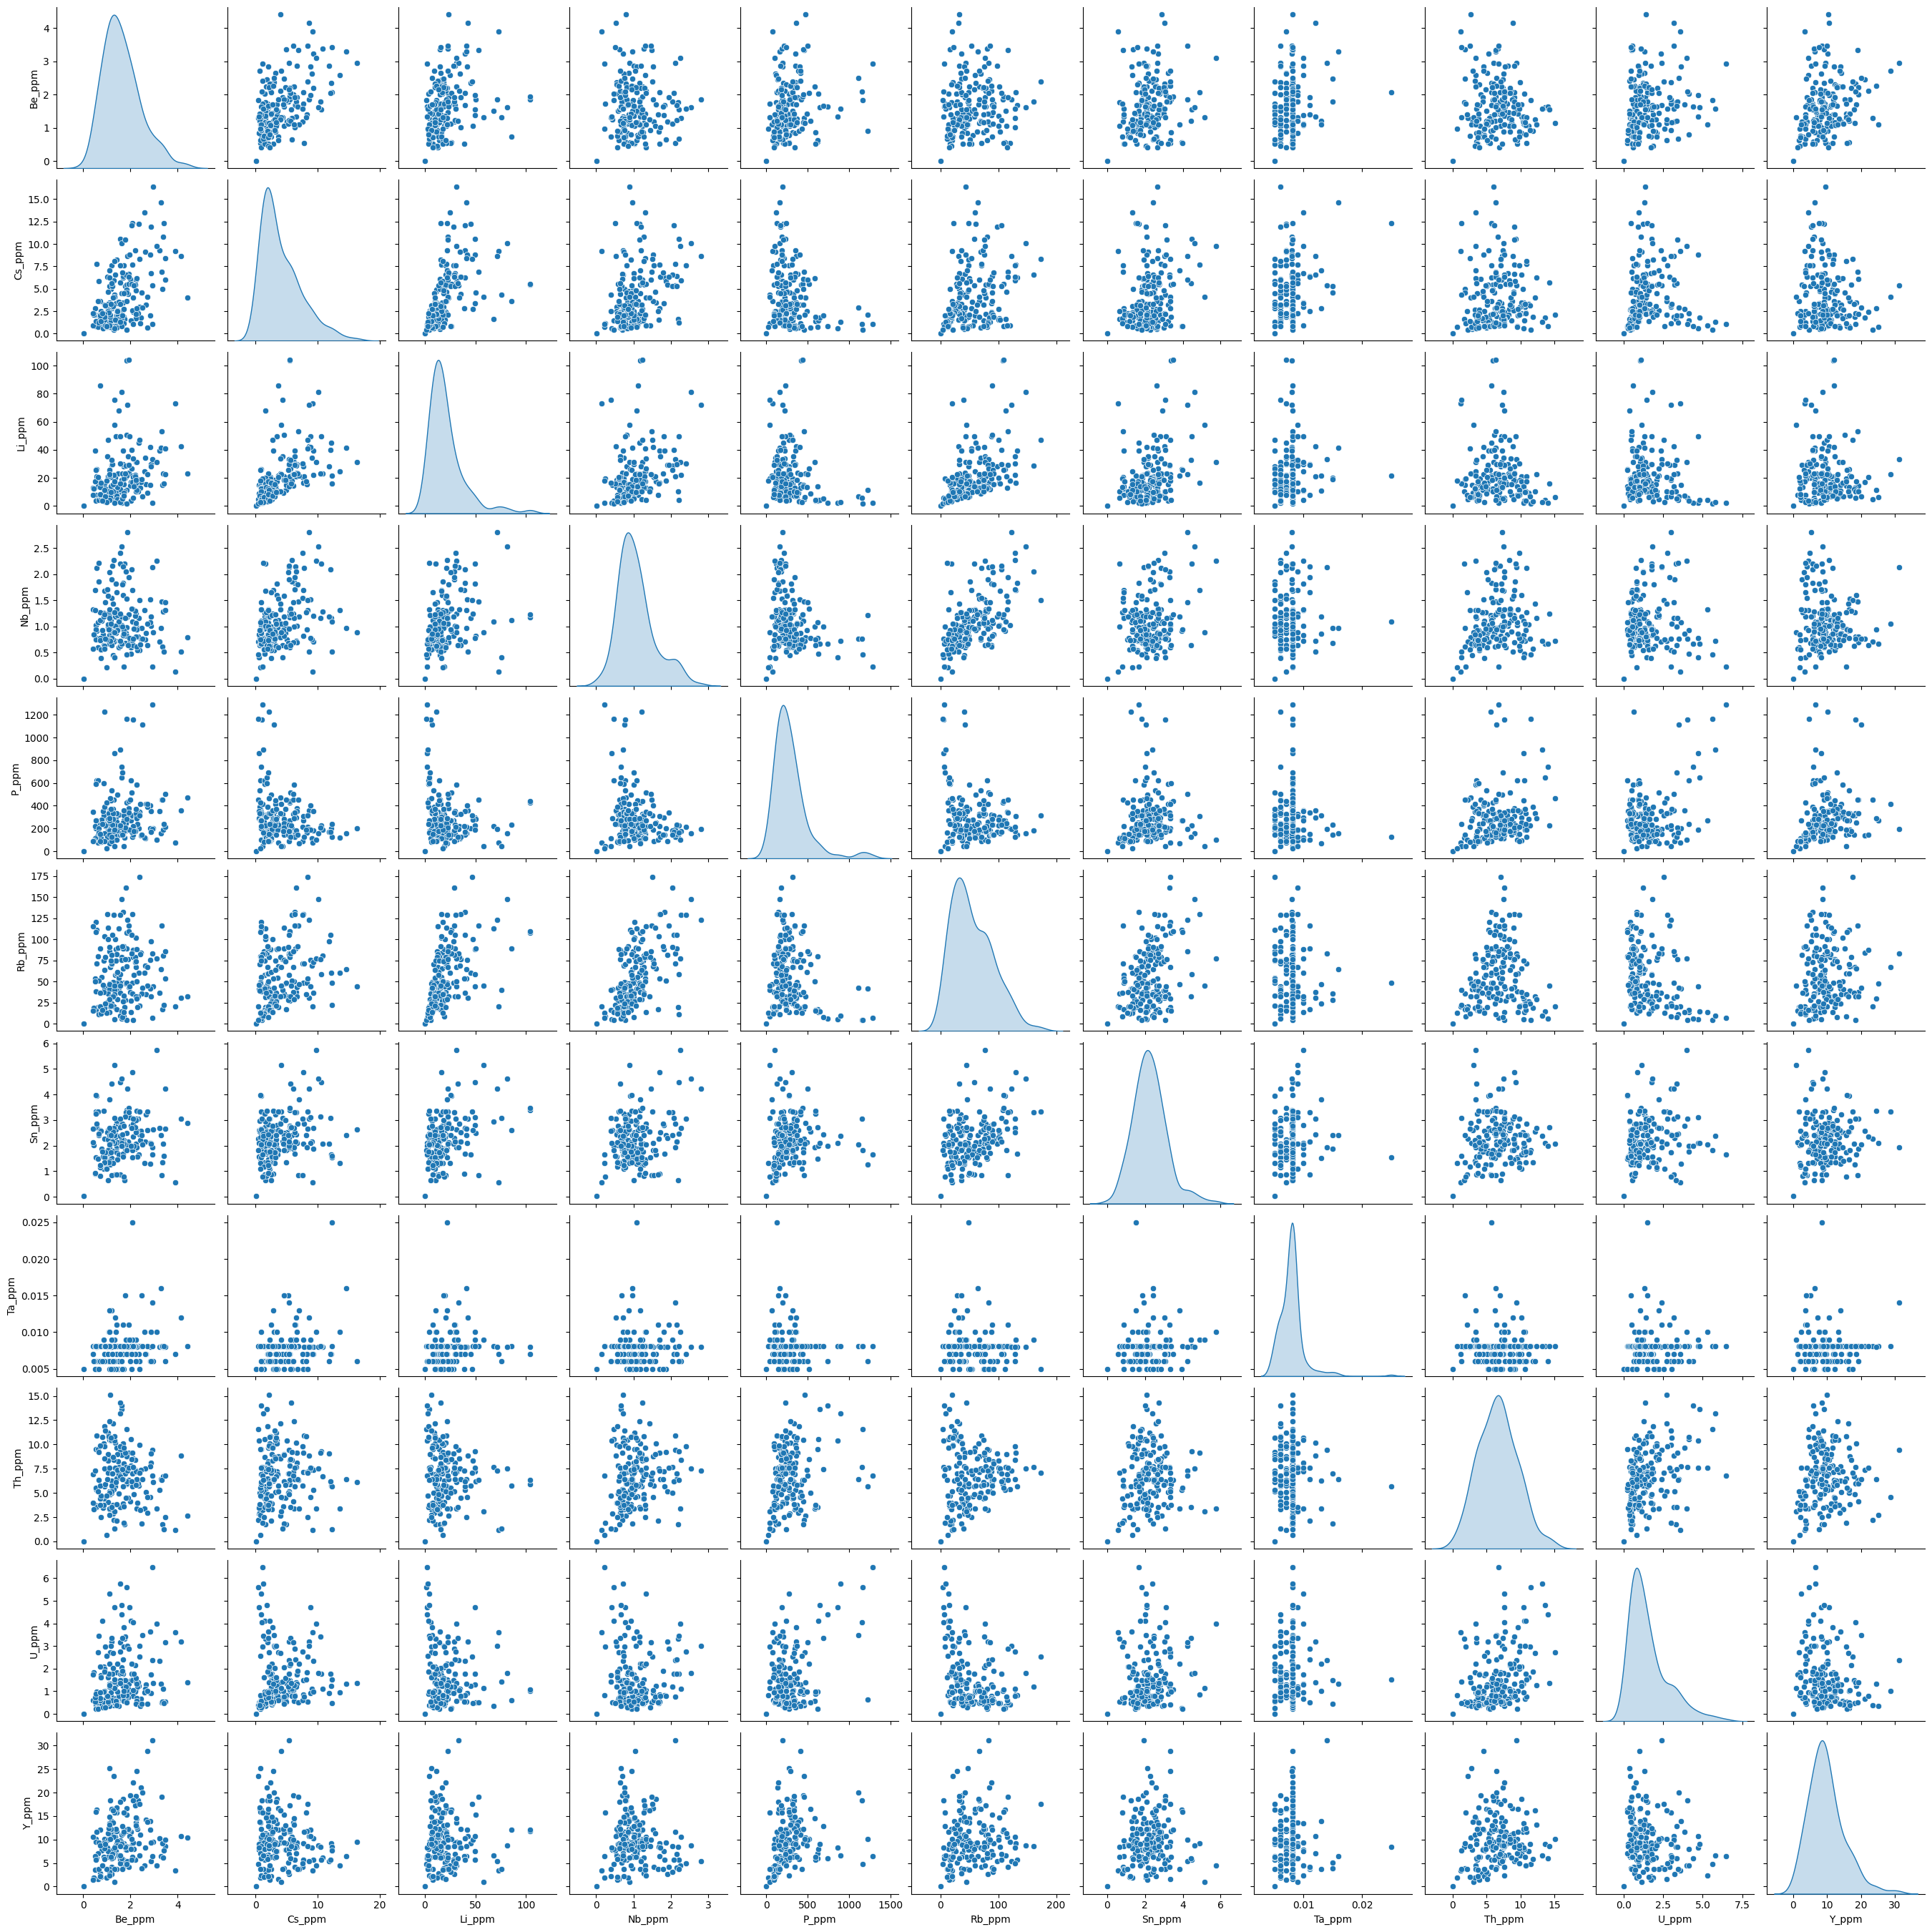

In [6]:
# Generate a satter pairplot for the cleaned data
sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()

### 6. STATISTICAL ANALYSIS

In [7]:
# Statistical analysis for the cleaned dataset
stats = data_cleaned.describe().T
print("Statistical Summary of Cleaned Data:\n", stats)

# Additional info: median, mode and skewness for each numeric column
median = data_cleaned.median()
mode = data_cleaned.mode().iloc[0]
skewness = data_cleaned.skew()  

# Display the additional statistics
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nSkewness:\n", skewness)

Statistical Summary of Cleaned Data:
         count        mean         std    min        25%         50%  \
Be_ppm  186.0    1.637425    0.799600  0.005    1.09525    1.507000   
Cs_ppm  186.0    4.120054    3.230095  0.010    1.67250    3.020000   
Li_ppm  186.0   21.106989   17.872380  0.020   10.21000   16.105000   
Nb_ppm  186.0    1.075177    0.496432  0.002    0.73875    0.976000   
P_ppm   186.0  292.032258  213.999972  2.000  162.25000  234.500000   
Rb_ppm  186.0   55.478758   35.353405  0.005   28.49725   47.585500   
Sn_ppm  186.0    2.253871    0.892154  0.020    1.66250    2.145000   
Ta_ppm  186.0    0.007940    0.002187  0.005    0.00700    0.008132   
Th_ppm  186.0    6.696823    2.893007  0.001    4.60300    6.569500   
U_ppm   186.0    1.567769    1.241835  0.001    0.65050    1.171500   
Y_ppm   186.0    9.842167    5.315123  0.001    6.27500    9.042500   

               75%       max  
Be_ppm    2.069500     4.414  
Cs_ppm    5.872500    16.360  
Li_ppm   25.8400

### 7. DATA NORMALISATION AND TRANSFORMATION 

In [8]:
# Standardize the cleaned data using StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_cleaned),
                                 columns=data_cleaned.columns)

# Min-Max normalization ( scaling to [0, 1] range)
data_minmax = (data_cleaned - 
               data_cleaned.min()) / (data_cleaned.max() - data_cleaned.min())

# Log transformation for skewed features (add small constant to avoid log(0))
data_log_transformed = np.log1p(data_cleaned)

# Display first few rows of normalized and log-transformed data
print("Standardized Data:\n", data_standardized.head())
print("\nMin-Max Normalized Data:\n", data_minmax.head())
print("\nLog-Transformed Data:\n", data_log_transformed.head())

Standardized Data:
      Be_ppm    Cs_ppm    Li_ppm    Nb_ppm     P_ppm    Rb_ppm    Sn_ppm  \
0 -2.047061 -1.275859 -1.183049 -2.167615 -1.358949 -1.573356 -2.510664   
1 -0.702773 -0.350796 -0.582744 -0.723450 -0.482759 -0.867450 -0.689934   
2 -0.653867 -0.208001 -0.555254 -0.481073  0.309093 -0.735452 -0.397718   
3 -0.572357  0.263844 -0.362819 -0.656797 -0.314080 -0.656889  0.287865   
4 -0.370463  0.751209 -0.014418 -0.725470  0.009220 -0.524041  0.209192   

     Ta_ppm    Th_ppm     U_ppm     Y_ppm  
0 -1.348190 -2.320733 -1.265061 -1.856538  
1  0.944311  1.383665 -0.729733 -0.378086  
2  0.944311  1.308454 -0.187138  0.673450  
3  0.027310  1.271022 -0.182293  0.342557  
4  1.861311  1.214874 -0.133847 -0.513160  

Min-Max Normalized Data:
      Be_ppm    Cs_ppm    Li_ppm    Nb_ppm     P_ppm    Rb_ppm    Sn_ppm  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.243139  0.182263  0.102658  0.254993  0.145412  0.143428  0.282723   
2  0.251985  

#### 8. TRAIN AND TEST MODELS WITH Li_ppm AS TARGET

In [ ]:
# Leverage data_standardized as the normalized dataset
data_final = data_standardized.copy()

# Separate features (X) and target (y)
X = data_final.drop('Li_ppm', axis=1)
y_numeric = data_final['Li_ppm']

# --- Convert continuous Li_ppm into 3 categories for classification ---
y_binned, bin_edges = pd.qcut(y_numeric, q=3, 
                              labels=['Low', 'Medium', 'High'], retbins=True)
print("Li_ppm bin edges:", bin_edges)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binned, test_size=0.3, random_state=42, stratify=y_binned
)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Prepare to store results
performance = []

# Define midpoint mapping for MRE and R² approximation
class_midpoints = {
    'Low': (bin_edges[0] + bin_edges[1]) / 2,
    'Medium': (bin_edges[1] + bin_edges[2]) / 2,
    'High': (bin_edges[2] + bin_edges[3]) / 2
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Convert to numeric midpoints
    y_test_num = y_test.map(class_midpoints)
    y_pred_num = pd.Series(y_pred).map(class_midpoints)

Li_ppm bin edges: [-1.18304916 -0.51074491  0.02578941  4.66459521]


#### 9. COMPARE PERFORMANCE USING CLASSIFICATION METRICS

In [ ]:
updated_results = []

# Loop through all trained models directly
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # --- Classification metrics ---
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Numeric mapping for MRE and R² (convert target to binned numeric classes)
    # Class_midpoints defined earlier when Li_ppm binned 
    y_test_num = y_test.map(class_midpoints).astype(float)
    y_pred_num = pd.Series(y_pred).map(class_midpoints).astype(float)

    valid_idx = y_test_num.notnull() & y_pred_num.notnull()
    mre = np.mean(np.abs(y_test_num[valid_idx] - y_pred_num[valid_idx]) / 
                  y_test_num[valid_idx])
    r2 = r2_score(y_test_num[valid_idx], y_pred_num[valid_idx])

    # Store results
    updated_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "MRE": mre,
        "R²": r2
    })

# Convert to DataFrame and display
comparison_df = pd.DataFrame(updated_results)

print("\n===RESULTS: Accuracy, Precision, Recall, F1, MRE, R² ===")
print(comparison_df)



===RESULTS: Accuracy, Precision, Recall, F1, MRE, R² ===
                 Model  Accuracy  Precision    Recall  F1 Score       MRE  \
0        Decision Tree  0.714286   0.705118  0.714286  0.707291 -2.609366   
1                  KNN  0.714286   0.710294  0.714286  0.711048 -2.030807   
2  Logistic Regression  0.678571   0.658469  0.678571  0.659939 -2.194620   
3          Naive Bayes  0.660714   0.651466  0.660714  0.652381 -2.773179   

         R²  
0  0.219643  
1 -0.000395  
2  0.010989  
3  0.208259  


#### 10. INTERPRETATION OF CONFUSION MATRICES AND METRIC DETAILS

In [ ]:
# Loop through all trained models directly for confusion matrix 
# and interpretation
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
    
    print(f"\n=== {name} ===")
    print("Confusion Matrix (rows = actual, columns = predicted):\n", cm)
    
    # Interpretation summary
    total = np.sum(cm)
    correct = np.trace(cm)
    misclassified = total - correct
    print(f"Total Samples: {total}")
    print(f"Correct Predictions: {correct}")
    print(f"Misclassifications: {misclassified}")
    
    # Class-wise accuracy
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    for label, acc in zip(['Low', 'Medium', 'High'], class_accuracy):
        print(f"Accuracy for {label}: {acc:.2f}")


=== Decision Tree ===
Confusion Matrix (rows = actual, columns = predicted):
 [[18  1  0]
 [ 2 11  6]
 [ 2  5 11]]
Total Samples: 56
Correct Predictions: 40
Misclassifications: 16
Accuracy for Low: 0.95
Accuracy for Medium: 0.58
Accuracy for High: 0.61

=== KNN ===
Confusion Matrix (rows = actual, columns = predicted):
 [[16  3  0]
 [ 3 10  6]
 [ 0  4 14]]
Total Samples: 56
Correct Predictions: 40
Misclassifications: 16
Accuracy for Low: 0.84
Accuracy for Medium: 0.53
Accuracy for High: 0.78

=== Logistic Regression ===
Confusion Matrix (rows = actual, columns = predicted):
 [[17  2  0]
 [ 6  7  6]
 [ 0  4 14]]
Total Samples: 56
Correct Predictions: 38
Misclassifications: 18
Accuracy for Low: 0.89
Accuracy for Medium: 0.37
Accuracy for High: 0.78

=== Naive Bayes ===
Confusion Matrix (rows = actual, columns = predicted):
 [[16  3  0]
 [ 7  8  4]
 [ 0  5 13]]
Total Samples: 56
Correct Predictions: 37
Misclassifications: 19
Accuracy for Low: 0.84
Accuracy for Medium: 0.42
Accuracy for H